In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loan Prediction

This project is about a loan prediction to a customer, which is very common in today's society. So we have to create a program that will help with the documents preprocessing of the clients.

To create our project we will use the "Loan Prediction Dataset"(https://www.kaggle.com/altruistdelhite04/loan-prediction-problem-dataset). We have two datasets - training and testing.

First we will import our datasets as variables ( train_loan and test_loan)

In [3]:
train_loan = pd.read_csv("train.csv")

In [4]:
test_loan = pd.read_csv("test.csv")

In [5]:
train_loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
test_loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [7]:
print(f"training set(row,col):{train_loan.shape}\n\ntesting set(row,col):{test_loan.shape}")

training set(row,col):(614, 13)

testing set(row,col):(367, 12)


As we can see our training set have one column more ("Loan_Status"), this is the column that stores the information whether the customer loan request is approved or declined.

Now lets check the type of the stored data in our training dataset and what is the information in it.

In [8]:
train_loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
train_loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


We don't need the "Loan_ID" column so we will remove it from our two datasets.

In [10]:
train_loan = train_loan.drop("Loan_ID", axis=1)

In [11]:
test_loan = test_loan.drop("Loan_ID", axis=1)

In [12]:
print(f"training set(row,col):{train_loan.shape}\n\ntesting set(row,col):{test_loan.shape}")

training set(row,col):(614, 12)

testing set(row,col):(367, 11)


Next thing is to find the null values in our traing set.

In [13]:
train_loan.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
dtype: int64

As we can see there are a plenty of null vallues, and if we remove them from our set,we will reduce it with almost 10%.
The better decision is to replace the null valuse with the mean value for each column, so will will fill the missing information and prepare the training dataset for the calculations.

Let's put the columns with null values in variable "null_cols" so we can use **for** loop to go thru alll nul values and replace them with mean value.

In [14]:
null_cols = ["Credit_History", "Self_Employed", "LoanAmount", "Dependents", "Loan_Amount_Term", "Gender", "Married"]

In [15]:
for col in null_cols:
    print(f"Before filling the NA values of {col}\n{train_loan[col].value_counts()}\n")
    train_loan[col] = train_loan[col].fillna(train_loan[col].dropna().mode().values[0])
    print(f"After filling the NA values of {col}\n{train_loan[col].value_counts()}\n", "-"*69)

Before filling the NA values of Credit_History
1.0    475
0.0     89
Name: Credit_History, dtype: int64

After filling the NA values of Credit_History
1.0    525
0.0     89
Name: Credit_History, dtype: int64
 ---------------------------------------------------------------------
Before filling the NA values of Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64

After filling the NA values of Self_Employed
No     532
Yes     82
Name: Self_Employed, dtype: int64
 ---------------------------------------------------------------------
Before filling the NA values of LoanAmount
120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

After filling the NA values of LoanAmount
120.0    42
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64
 -------

Now let's check if we replaced all the missing values in our dataset

In [16]:
train_loan.isnull().sum().sort_values(ascending=False)

Loan_Status          0
Property_Area        0
Credit_History       0
Loan_Amount_Term     0
LoanAmount           0
CoapplicantIncome    0
ApplicantIncome      0
Self_Employed        0
Education            0
Dependents           0
Married              0
Gender               0
dtype: int64

We replaced all the null values and with full dataset, the next thing to do are graphics with the information from the columns. First plots are for the numeric data in our dataset. We put our numerc data columns in variable, so we can use **for** loop to go thru all the columns and build graphics.

In [17]:
num_columns = ["ApplicantIncome", "CoapplicantIncome","LoanAmount", "Loan_Amount_Term","Credit_History"]

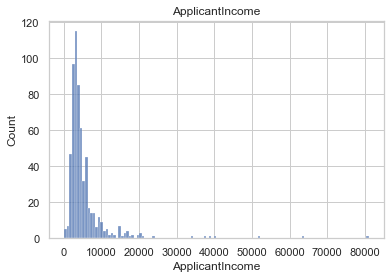

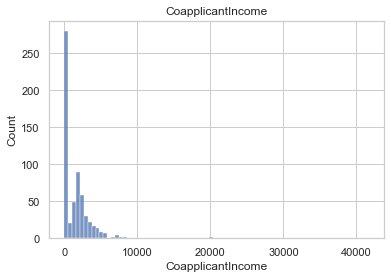

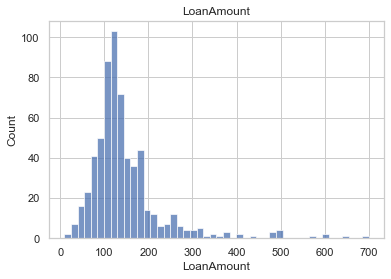

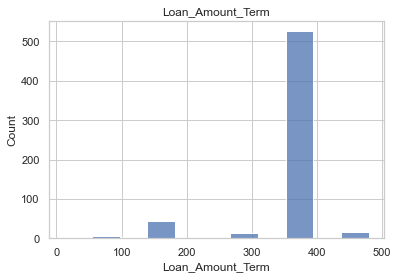

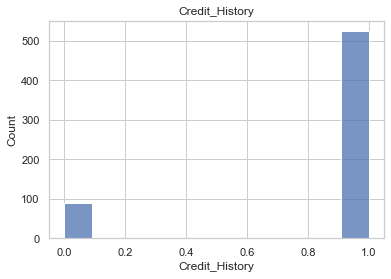

In [18]:
sns.set_theme(style = "whitegrid")
for i in num_columns:
    sns.histplot(x = i, data = train_loan)
    plt.title(i)
    plt.show()

The bars below are showing the distribution of approved and rejected loans

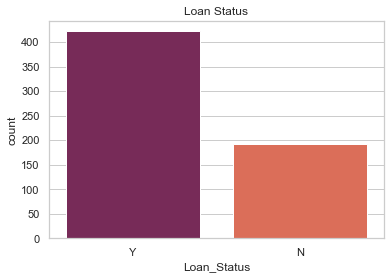

In [19]:
sns.countplot(x = "Loan_Status", palette="rocket", data = train_loan)
plt.title("Loan Status")
plt.show()

Next graphics are showing the distribution of approved and rejected loans by gender, marriage status, family members, education, self employed or employee and area of the property. We will put them all in one variable, so we can plot them like our numeric data.

In [20]:
obj_columns = ["Gender","Married", "Dependents", "Education","Self_Employed", "Property_Area", "Loan_Status"]

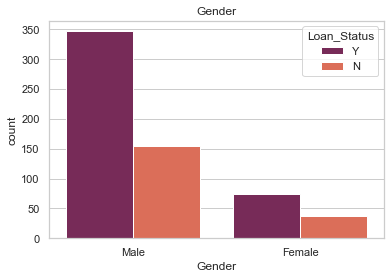

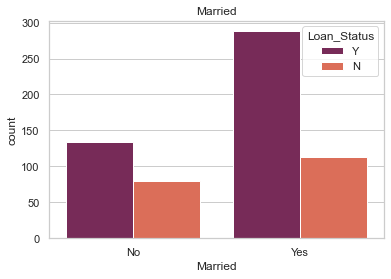

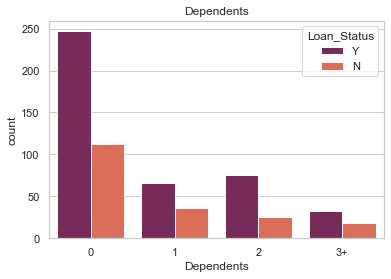

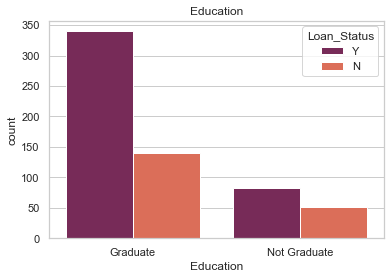

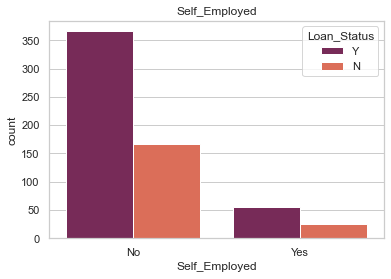

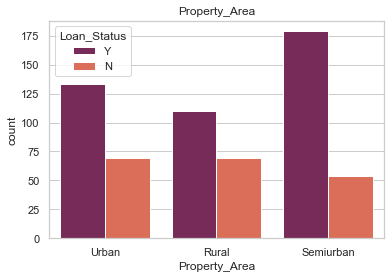

In [21]:
for i in obj_columns[:-1]:
    sns.countplot(x = i, hue="Loan_Status", palette="rocket", data = train_loan)
    plt.title(i)
    plt.show()

After we plot the graphics, we need to check the unique values of the columns that stores the object data.

In [22]:
for col in obj_columns:
    print(f"The unique values of {col} are:\n{train_loan[col].unique()}")

The unique values of Gender are:
['Male' 'Female']
The unique values of Married are:
['No' 'Yes']
The unique values of Dependents are:
['0' '1' '2' '3+']
The unique values of Education are:
['Graduate' 'Not Graduate']
The unique values of Self_Employed are:
['No' 'Yes']
The unique values of Property_Area are:
['Urban' 'Rural' 'Semiurban']
The unique values of Loan_Status are:
['Y' 'N']


We need to replace the information in this columns with numbers and change their type from object to int, so that way our model will train properly.

In [23]:
train_loan["Gender"].replace({"Male": 1, "Female": 2}, inplace=True)
train_loan["Married"].replace({"Yes": 1, "No": 2}, inplace=True)
train_loan["Dependents"].replace({"0": 0, "1": 1, "2": 2, "3+": 3}, inplace=True)
train_loan["Education"].replace({"Graduate": 1, "Not Graduate": 2}, inplace=True)
train_loan["Self_Employed"].replace({"Yes": 1, "No": 2}, inplace=True)
train_loan["Property_Area"].replace({"Rural": 1, "Semiurban": 2, "Urban": 3}, inplace=True)
train_loan["Loan_Status"].replace({"Y": 1, "N": 0}, inplace=True)

In [24]:
train_loan.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

For more detailed analyse lets create **correlation matrix** and **correlation table**

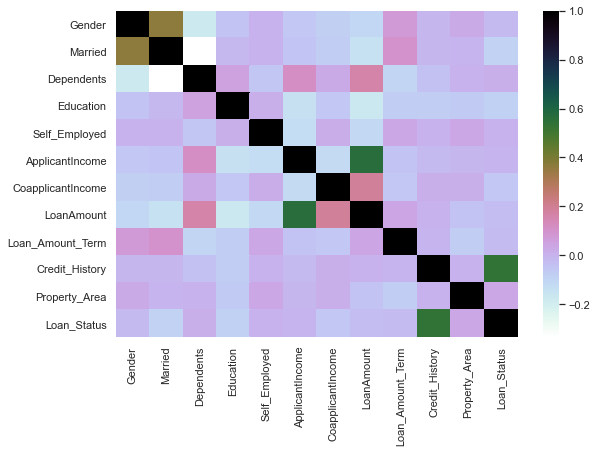

In [25]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(train_loan.corr() ,cmap='cubehelix_r',ax = ax)
plt.show()

Correlation table will help us to find which values dipend one from another

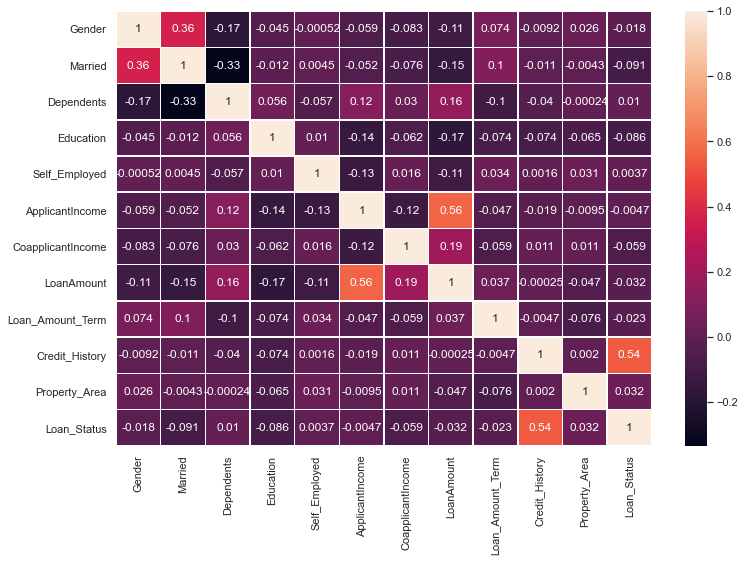

In [26]:
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(train_loan.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

As we can see from the table **Loan_status** has highest correlation with **Credit_History**. Which means that decision about the approval of a the loan is highly dependent from the credit history of the client

We are done with transforming and analysis the train set, so now we need to check our test set for null valuse, replace them if we have and convert the data in numbers.

First thing is to check in there are null values in the columns.

In [27]:
test_loan.isnull().sum().sort_values(ascending=False)

Credit_History       29
Self_Employed        23
Gender               11
Dependents           10
Loan_Amount_Term      6
LoanAmount            5
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Married               0
dtype: int64

As we can see the null vallues in test set are in the same columns as in the train set, so we can use the variable **null_cols** that have the names of this columns and put it in **for** loop to replace all the missing values.

In [28]:
for col in null_cols[:-1]:
    print(f"Before filling the NA values of {col}\n{test_loan[col].value_counts()}\n")
    test_loan[col] = test_loan[col].fillna(test_loan[col].dropna().mode().values[0])
    print(f"After filling the NA values of {col}\n{test_loan[col].value_counts()}\n", "-"*69)

Before filling the NA values of Credit_History
1.0    279
0.0     59
Name: Credit_History, dtype: int64

After filling the NA values of Credit_History
1.0    308
0.0     59
Name: Credit_History, dtype: int64
 ---------------------------------------------------------------------
Before filling the NA values of Self_Employed
No     307
Yes     37
Name: Self_Employed, dtype: int64

After filling the NA values of Self_Employed
No     330
Yes     37
Name: Self_Employed, dtype: int64
 ---------------------------------------------------------------------
Before filling the NA values of LoanAmount
150.0    12
125.0    11
110.0    10
100.0     9
90.0      9
         ..
186.0     1
163.0     1
360.0     1
77.0      1
297.0     1
Name: LoanAmount, Length: 144, dtype: int64

After filling the NA values of LoanAmount
150.0    17
125.0    11
110.0    10
187.0     9
100.0     9
         ..
55.0      1
74.0      1
66.0      1
142.0     1
213.0     1
Name: LoanAmount, Length: 144, dtype: int64
 -------

Next step is to check our type of the stored data.

In [29]:
test_loan.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

Five of our columns content **object** data. Let's transform it to numeric

In [30]:
test_loan["Gender"].replace({"Male": 1, "Female": 2}, inplace=True)
test_loan["Married"].replace({"Yes": 1, "No": 2}, inplace=True)
test_loan["Dependents"].replace({"0": 0, "1": 1, "2": 2, "3+": 3}, inplace=True)
test_loan["Education"].replace({"Graduate": 1, "Not Graduate": 2}, inplace=True)
test_loan["Self_Employed"].replace({"Yes": 1, "No": 2}, inplace=True)
test_loan["Property_Area"].replace({"Rural": 1, "Semiurban": 2, "Urban": 3}, inplace=True)

In [31]:
test_loan.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
dtype: object